### 1. install and import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### 2. load dataset and pre-process

In [2]:
# Loading data for first time will result in downloading the dataset. (~165 MB)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
print(x_train.shape, y_train.shape,'\n',x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) 
 (10000, 32, 32, 3) (10000, 1)


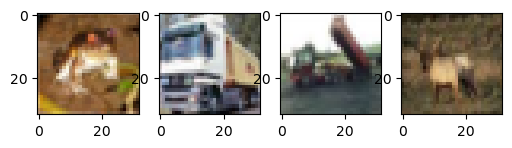

In [5]:
# visualize a sample of dataset
fig, ax = plt.subplots(ncols=4, figsize=(6,6))
for i in range(0,4):
    ax[i].imshow(x_train[i])

In [6]:
#Normalize the data. Pixel values range from 0 to 256, therefore, dividing by 255.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
print(('The normalized values range from {} to {}').format(x_train.min(), x_train.max()))

The normalized values range from 0.0 to 1.0


### 3. Build and train the model

#### 3.1 ANN model

In [8]:
# First, an artificial neural network (ANN)
ann_model = Sequential()

ann_model.add(Flatten(input_shape = (32,32,3)))
ann_model.add(Dense(3000, activation= 'relu'))
ann_model.add(Dense(1000, activation= 'relu'))
ann_model.add(Dense(10, activation= 'softmax')) # "softmax" for multi-classs classification

In [9]:
# compile the model using appropriate hyperparameters
ann_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit model
log = ann_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.8149 - accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6239 - accuracy: 0.4244
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5424 - accuracy: 0.4570
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4830 - accuracy: 0.4783
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4305 - accuracy: 0.4972
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.3900 - accuracy: 0.5128
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3482 - accuracy: 0.5275
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3146 - accuracy: 0.5398
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2816 - accuracy: 0.5496
Epoch 10/10
1563/1563 [==============================] - 63s 41m

In [12]:
y_pred = ann_model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.56      0.59      1000
           1       0.56      0.77      0.65      1000
           2       0.44      0.37      0.40      1000
           3       0.41      0.25      0.31      1000
           4       0.51      0.42      0.46      1000
           5       0.35      0.61      0.44      1000
           6       0.60      0.54      0.57      1000
           7       0.63      0.56      0.59      1000
           8       0.63      0.65      0.64      1000
           9       0.57      0.52      0.54      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



#### 3.2 CNN model

In [18]:
# Build cnn model
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
    
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
    
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax')) # "softmax" for multi-classs classification

In [19]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [21]:
cnn_log = cnn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 30ms/step - loss: 1.4755 - accuracy: 0.4709
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1219 - accuracy: 0.6094
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9887 - accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9106 - accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8525 - accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8039 - accuracy: 0.7216
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7605 - accuracy: 0.7360
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7230 - accuracy: 0.7496
Epoch 9/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6848 - accuracy: 0.7623
Epoch 10/10
1563/1563 [==============================] - 79s 51m

In [22]:
y_pred = cnn_model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.84      0.81      0.82      1000
           2       0.63      0.55      0.58      1000
           3       0.47      0.59      0.52      1000
           4       0.71      0.53      0.61      1000
           5       0.62      0.58      0.60      1000
           6       0.61      0.87      0.72      1000
           7       0.82      0.67      0.74      1000
           8       0.80      0.81      0.81      1000
           9       0.81      0.78      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



1. ANN performed poorly on images with an accuracy of ~56% where as CNN performed decent enough with an accuracy of ~77%.
2. It's clear that convolutional neural network performs better than artificial neural networks in the classification of images.